In [1]:
import numpy as np
import astropy.units as u 
import scipy.stats as st

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
%config InlineBackend.figure_format = 'svg'

In [3]:
def weighted_chi(o,e,sigma):
    w = 1/sigma**2
    c = np.sum(w*(o-e)**2)
    c = c/len(o)             #len(o) represents the degrees of freedom.
    return c

In [4]:
"""boxEdata.png"""
load_resistance = np.asarray([2e5,2e5,2e5,2e5,2e5,2e5,2e5,2e5,2e5,2e5,2e4,2e4,2e4,2e4,2e4,2e4,2e4,2e4,2e4,2e4,
                              1e4,1e4,9.98e2,9.98e2,9.98e2,9.98e2,9.98e2,9.98e2,9.98e2,9.98e2,9.98e2,9.98e2])   #*u.ohm

CH1_voltage     = np.asarray([36,36,33.2,20.8,25,21.6,20.4,9.2,6,4.4,18,17.6,13.6,11.2,9.6,7.6,6.4,6.8,6.4,
                              5.6,7.2,4.8,13.2,7.8,20,27.2,33,34.4,37.6,38.8,38.85,40])                         #*u.volt

CH1_frequency   = np.asarray([5.1e1,9.6e1,2.94e2,5.09e2,7.09e2,9.08e2,1.01e3,2.96e3,5.08e3,7.1e3,9.01e3,
                             9.5e3,1.266e4,1.53e4,1.71e4,1.99e4,2.222e4,2.421e4,2.65e4,2.85e4,3.195e4,3.509e4,
                             3.69e4,4.2e4,4.2e4,4.55e4,4.85e4,4.94e4,5.3e4,5.59e4,5.83e4,6.03e4])               #*u.hertz

CH2_voltage     = np.asarray([8,10.8,20.8,28.4,32.4,35.2,36.4,39.6,39.6,39.2,36.8,37.2,38.4,39,39.2,39.6,40,
                             40.8,40.8,41.4,44,43,42,42,39,35,31,29,24,22,19,18])                               #*u.volt

CH2_frequency   = np.asarray([5.1e1,9.5e1,2.97e2,5.1e2,7.08e2,9.06e2,1.012e3,2.95e3,5.063e3,7.042e3,9.015e3,
                             9.5e3,1.27e4,1.54e4,1.71e4,2e4,2.241e4,2.45e4,2.67e4,2.916e4,3.226e4,3.52e4,
                             3.72e4,4.003e4,4.3e4,4.545e4,4.9e4,4.97e4,5.2e4,5.57e4,5.8e4,6.01e4])              #*u.hertz

phase_angle     = np.asarray([145,130,110,108,103,101,105,107,120,138,100,102,104,102,103,106,106,110,110,111,
                              107,125,110,120,102,98,95,100,98,98,94,97])                                       #*u.degree

In [5]:
beg = 25  # Start index for our data values.
end = 32 # End index for data.

In [6]:
# We suspect at least one capacitor component given the DC impedance.
impedance = ((CH1_voltage/CH2_voltage)*load_resistance)[beg:end]

In [7]:
angular_frequency = (2*np.pi*CH1_frequency)[beg:end]

In [8]:
r     = load_resistance[beg:end]
error = impedance**2*(0.0072+(4/r**2))**(1/2)

In [9]:
p,V = np.polyfit(angular_frequency**2,impedance**2,deg=1,full=False,cov=True,w=1/error)

In [10]:
def linear_e(ang_freq):
    zy_squared = (ang_freq**2)*p[0]+p[1]
    return zy_squared

In [11]:
csr = weighted_chi(impedance**2,linear_e(angular_frequency),error)
slope = p[0]
intercept = -p[1]

inductor = slope**(1/2) 
r_1       = intercept**(1/2)
print('inductance: ',inductor, 'r_1: ',r_1)

inductance:  0.007953850229880509 r_1:  2147.339921613731


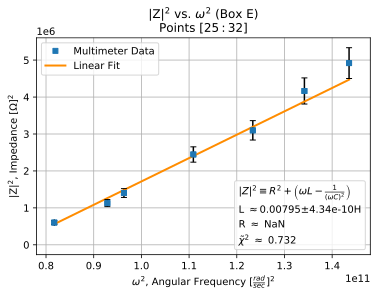

In [12]:
"""Z**2 VERSUS w**2"""
l1, = plt.plot(angular_frequency**2,impedance**2,'s',label='Multimeter Data',markersize=5,linewidth=2)

l2, = plt.plot(angular_frequency**2,linear_e(angular_frequency),'r',label='Linear Fit',color='darkorange',linewidth=2)

plt.errorbar(angular_frequency**2,impedance**2,xerr=0,yerr=error,fmt='s',ecolor='k',capsize=3,capthick=1,markersize=5)

plt.xlabel('$\\omega^2$, Angular Frequency $[\\frac{rad}{sec}]^2$')
plt.xlim(0.78e11,1.48e11)
plt.ylabel('|Z|$^2$, Impedance [$\\Omega]^2$')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.title('|Z|$^2$ vs. $\\omega^2$ (Box E)\nPoints ${[25:32]}$')

csrf            = format(csr, ".3g")
csrf_string     = '$\\tilde{\\chi}^2$ $\\approx$ ' + str(csrf)

l3, = plt.plot(1,0,'none',label='$|Z|^{2} \\equiv R^{2} + \\left(\\omega L - \\frac{1}{\\left(\\omega C \\right)^{2}}\\right)$')

slope_err = V[0,0]**(1/2)
l_err = 2*p[0]*slope_err

l_string = 'L $\\approx$' + str(format(inductor, ".3g")) + '$\\pm$' + str(format(l_err, ".3g")) + 'H'
r_string = 'R $\\approx$ NaN'

l4, = plt.plot(1,0,'none',label=l_string)
l5, = plt.plot(1,0,'none',label=r_string)

l6, = plt.plot(1,0,'none',label=csrf_string)




plt.grid()

legend1 = plt.legend(handles=[l1,l2],loc='upper left',ncol=1)
ax = plt.gca().add_artist(legend1)
plt.legend(handletextpad=0,handlelength=0,handles=[l3,l4,l5,l6],loc='lower right')

plt.savefig('boxE_capacitance',dpi=300,bbox_inches='tight')

In [13]:
beg = 10  # Start index for our data values.
end = 16 # End index for data.
angular_frequency = (2*np.pi*CH1_frequency)[beg:end]
angular_frequency = 1/angular_frequency

impedance = ((CH1_voltage/CH2_voltage)*load_resistance)[beg:end]
r     = load_resistance[beg:end]
error = impedance**2*(0.0072+(4/r**2))**(1/2)

p,V = np.polyfit(angular_frequency**2,impedance**2,deg=1,full=False,cov=True,w=1/error)

In [14]:
csr = weighted_chi(impedance**2,linear_e(angular_frequency),error)
slope = p[0]
intercept = -p[1]

capacitor = slope**(-1/2) 
r_2       = intercept**(1/2)
print('capacitance: ',capacitor, 'r_2: ',r_2)

capacitance:  1.6964982445644692e-09 r_2:  2606.262778415945


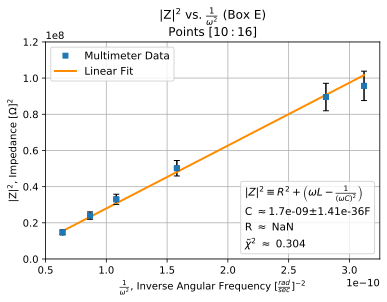

In [15]:
"""Z**2 VERSUS w**-2"""
l1, = plt.plot(angular_frequency**2,impedance**2,'s',label='Multimeter Data',markersize=5,linewidth=2)

l2, = plt.plot(angular_frequency**2,linear_e(angular_frequency),'r',label='Linear Fit',color='darkorange',linewidth=2)

plt.errorbar(angular_frequency**2,impedance**2,xerr=0,yerr=error,fmt='s',ecolor='k',capsize=3,capthick=1,markersize=5)

plt.xlabel('$\\frac{1}{\\omega^2}$, Inverse Angular Frequency $[\\frac{rad}{sec}]^{-2}$')
plt.ylabel('|Z|$^2$, Impedance [$\\Omega]^2$')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.title('|Z|$^2$ vs. $\\frac{1}{\\omega^2}$ (Box E)\nPoints ${[10:16]}$')
plt.xlim(0.5e-10,3.25e-10)
plt.ylim(0e8,1.2e8)

csrf            = format(csr, ".3g")
csrf_string     = '$\\tilde{\\chi}^2$ $\\approx$ ' + str(csrf)

l3, = plt.plot(0,0,'none',label='$|Z|^{2} \\equiv R^{2} + \\left(\\omega L - \\frac{1}{\\left(\\omega C \\right)^{2}}\\right)$')

slope_err = V[0,0]**(1/2)
c_err     = (4/p[0]**3)*slope_err

c_string = 'C $\\approx$' + str(format(capacitor, ".3g")) + '$\\pm$' + str(format(c_err, ".3g")) + 'F'
r_string = 'R $\\approx$ NaN'

l4, = plt.plot(0,0,'none',label=c_string)
l5, = plt.plot(0,0,'none',label=r_string)

l6, = plt.plot(0,0,'none',label=csrf_string)


plt.grid()

legend1 = plt.legend(handles=[l1,l2],loc='upper left',ncol=1,fontsize=10.5)
ax = plt.gca().add_artist(legend1)
plt.legend(handletextpad=0,handlelength=0,handles=[l3,l4,l5,l6],loc='lower right',ncol=1,fontsize=10.5)

plt.savefig('boxE_inductance',dpi=300,bbox_inches='tight')

In [16]:
angular_frequency = (2*np.pi*CH1_frequency)
obs_w0 = angular_frequency[23]
exp_w0 = (inductor*capacitor)**(-1/2)

print('observed w0:', obs_w0,'expected w0:', exp_w0)

observed w0: 263893.7829015426 expected w0: 272229.12559085106


In [17]:
beg = 0  # Start index for our data values.
end = 32 # End index for data.

In [18]:
# We suspect at least one capacitor component given the DC impedance.
impedance = ((CH1_voltage/CH2_voltage)*load_resistance)[beg:end]
impedance = 1/impedance

In [19]:
angular_frequency = (2*np.pi*CH1_frequency)[beg:end]

In [20]:
r     = load_resistance[beg:end]
error = impedance**2*(0.0072+(4/r**2))**(1/2)

In [21]:
p,V = np.polyfit(angular_frequency**2,impedance**2,deg=1,full=False,cov=True,w=1/error)

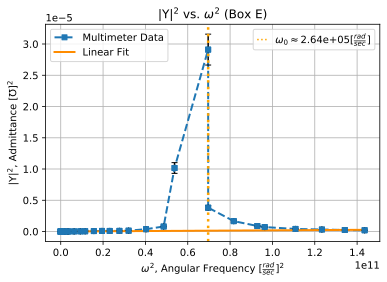

In [22]:
"""Z**2 VERSUS w**2"""
l1, = plt.plot(angular_frequency**2,impedance**2,'s--',label='Multimeter Data',markersize=5,linewidth=2)

l2, = plt.plot(angular_frequency**2,linear_e(angular_frequency),'r',label='Linear Fit',color='darkorange',linewidth=2)

plt.errorbar(angular_frequency**2,impedance**2,xerr=0,yerr=error,fmt='s',ecolor='k',capsize=3,capthick=1,markersize=5)

plt.xlabel('$\\omega^2$, Angular Frequency $[\\frac{rad}{sec}]^2$')
plt.ylabel('|Y|$^2$, Admittance [$\\mho$]$^2$')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.title('|Y|$^2$ vs. $\\omega^2$ (Box E)')

w0_string = '$\\omega_0 \\approx$' + str(format(angular_frequency[23], ".3g")) + '[$\\frac{rad}{sec}$]'
plt.axvline(x=angular_frequency[23]**2,color='orange',ls=':',label=w0_string,linewidth=2.5)
l3, = plt.plot(0,0,'none',color='orange',ls=':',label=w0_string)


plt.grid()

legend1 = plt.legend(handles=[l1,l2],loc='upper left',ncol=1)
ax = plt.gca().add_artist(legend1)
plt.legend(handlelength=1,handles=[l3],loc='upper right')

plt.savefig('boxE_resonance',dpi=300,bbox_inches='tight')